### A/B testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

#### Null hypothesis
- The click-through rate is not affected by the redesign

#### The vote for the Civil Rights Act in 1964

153 Democrats and 136 Republicans voted yea.<br>
91 Democrats and 35 Republicans voted nea. <br>
<br>
Did party affiliation make a difference in the vote?<br><br>
To answer the question, we will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. <br><br>
We will use the fraction of Democrats voting in favor as our test statistic - <br><br>
Then we will evaluate the probability of observing a fraction at least as small as 153/244.<br><br>
To do this we will permute the party lables of the House voters, arbitrarily divide them into 'Democrats' and 'Republicans' and compute the fraction of the Democrats voting yea. 

In [2]:
# def diff_frac(data_A, data_B):
#     frac_A = np.sum(data_A) / len(data_A)
#     frac_B = np.sum(data_B) / len(data_B)
#     return frac_B - frac_A

In [3]:
def draw_perm_reps(data_1, data_2, func, size=1):
    '''Generates multiple permutaion replicates'''
    
    def permutation_sample(data1, data2):
        '''Generate a permutation sample from two data sets.'''
        data = np.concatenate((data1, data2))
        permuted_data = np.random.permutation(data)
        perm_sample_1 = permuted_data[:len(data1)]
        perm_sample_2 = permuted_data[len(data1):]
        return perm_sample_1, perm_sample_2
    
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

In [4]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0004


### A time-on-website analog
We will perform an A/B test to determine if the dead-ball era rule changes resulted in a slower rate of ho-hitters using the difference in mean inter-no-hitter as our test statistic. 

In [5]:
def diff_of_means(data_1, data_2):
    '''Difference of means of two arrays.'''
    diff = data_1.mean() - data_2.mean()
    return diff

In [6]:
nht = pd.read_csv('mlb_nohitters.csv', index_col='date', parse_dates=['date'])
dead_ball_era = nht.loc[:'1920-06']
live_ball_era = nht.loc['1920-06':]
nht_dead = np.array(dead_ball_era['game_number'].diff() - 1).astype(int)
nht_dead[0] = -1
nht_dead

array([-1.000e+00,  8.940e+02,  1.000e+01,  1.300e+02,  1.000e+00,
        9.340e+02,  2.900e+01,  6.000e+00,  4.850e+02,  2.540e+02,
        3.720e+02,  8.100e+01,  1.910e+02,  3.550e+02,  1.800e+02,
        2.860e+02,  4.700e+01,  2.690e+02,  3.610e+02,  1.730e+02,
        2.460e+02,  4.920e+02,  4.620e+02,  1.319e+03,  5.800e+01,
        2.970e+02,  3.100e+01,  2.970e+03,  6.400e+02,  2.370e+02,
        4.340e+02,  5.700e+02,  7.700e+01,  2.710e+02,  5.630e+02,
        3.365e+03,  8.900e+01,  0.000e+00,  3.790e+02,  2.210e+02,
        4.790e+02,  3.670e+02,  6.280e+02,  8.430e+02,  1.613e+03,
        1.101e+03,  2.150e+02,  6.840e+02,  8.140e+02,  2.780e+02,
        3.240e+02,  1.610e+02,  2.190e+02,  5.450e+02,  7.150e+02,
        9.660e+02,  6.240e+02,  2.900e+01,  4.500e+02,  1.070e+02,
        2.000e+01,  9.100e+01,  1.325e+03,  1.240e+02,  1.468e+03,
        1.040e+02,  1.309e+03,  4.290e+02,  6.200e+01,  1.878e+03,
        1.104e+03,  1.230e+02,  2.510e+02,  9.300e+01,  1.880e

In [7]:
nht_live = np.array(live_ball_era['game_number'].diff() - 1).astype(int)
nht_live[0] = 645
nht_live

array([ 645., 2088.,   42., 2090.,   11.,  886., 1665., 1084., 2900.,
       2432.,  750., 4021., 1070., 1765., 1322.,   26.,  548., 1525.,
         77., 2181., 2752.,  127., 2147.,  211.,   41., 1575.,  151.,
        479.,  697.,  557., 2267.,  542.,  392.,   73.,  603.,  233.,
        255.,  528.,  397., 1529., 1023., 1194.,  462.,  583.,   37.,
        943.,  996.,  480., 1497.,  717.,  224.,  219., 1531.,  498.,
         44.,  288.,  267.,  600.,   52.,  269., 1086.,  386.,  176.,
       2199.,  216.,   54.,  675., 1243.,  463.,  650.,  171.,  327.,
        110.,  774.,  509.,    8.,  197.,  136.,   12., 1124.,   64.,
        380.,  811.,  232.,  192.,  731.,  715.,  226.,  605.,  539.,
       1491.,  323.,  240.,  179.,  702.,  156.,   82., 1397.,  354.,
        778.,  603., 1001.,  385.,  986.,  203.,  149.,  576.,  445.,
        180., 1403.,  252.,  675., 1351., 2983., 1568.,   45.,  899.,
       3260., 1025.,   31.,  100., 2055., 4043.,   79.,  238., 3931.,
       2351.,  595.,

In [9]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


### Test of correlation

#### How do we see if the $\rho=0.54$ correlation is due to chance
#### Hypothesis test of correlation 
- Posit null hypothesis: the two variables are completely uncorrelated
- Simulate data assuming null hypothesis is true
- Use Pearson correlation, $\rho$, as test statistic
- Compute p-value as fraction of replicates that have $\rho$ at least as large as observed

In [10]:
female_fert_ill = pd.read_csv('female_literacy_fertility.csv')
fertility = np.array(female_fert_ill['fertility'])
illiteracy = np.array(100-female_fert_ill['female literacy'])

In [11]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [14]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [27]:
bee_sperm = pd.read_csv('bee_sperm.csv', skiprows=3, index_col='Specimen')
control = np.array(bee_sperm.loc[bee_sperm['Treatment']=='Control']['Sperm Volume per 500 ul'] * 0.000001)
len(control)

145

In [32]:
treated = np.array(bee_sperm.loc[bee_sperm['Treatment']=='Pesticide']['Sperm Volume per 500 ul'] * 0.000001)
len(treated)

90

In [33]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

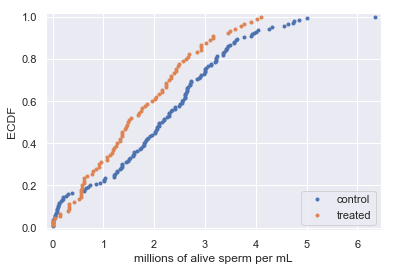

In [34]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

In [40]:
def bootstrap_replicate_1d(data, func):
    '''Generate bootstrap replicate of 1D data.'''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    '''Draw bootstrap replicates'''
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [43]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0035
